<a href="https://colab.research.google.com/github/julianafalves/Sinais-Digitais/blob/main/Projeto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install scikit_dsp_comm

     |████████████████████████████████| 90 kB 7.7 MB/s 


In [4]:
import sk_dsp_comm.sigsys as ss
import numpy as np
from matplotlib import pylab
from pylab import *
import scipy.signal as signal
from IPython.display import Audio, display
from IPython.display import Image, SVG

In [5]:
pylab.rcParams['savefig.dpi'] = 100 # default 72
pylab.rcParams['figure.figsize'] = (6.0, 4.0) # default (6,4)
%config InlineBackend.figure_formats=['png'] # default for inline viewing
#config InlineBackend.figure_formats=['svg'] # SVG inline viewing
#%config InlineBackend.figure_formats=['pdf'] # render pdf figs for LaTeX

## Acyclic convolution in matlab

In [6]:
# Convolução acíclica
np.convolve([1,2], [3,4])

array([ 3, 10,  8])

In [9]:
np.convolve([1,2], [3,4], mode='same')

array([ 3, 10])

In [10]:
np.convolve([1,2], [3,4,0], mode='same')

array([ 3, 10,  8])

## Acyclic FFT convolution in matlab

In [13]:
def nextpow2(x):
    return 1 if x == 0 else (x - 1).bit_length()

In [25]:
x = [1, 2, 3, 4]
h = [1, 1, 1]

nx = len(x)
nh = len(h)
nfft = 2**nextpow2(nx+nh-1)
xzp = x + [0] * (nfft-nx)
hzp = h + [0] * (nfft-nh)
X = np.fft.fft(xzp)
H = np.fft.fft(hzp)

In [30]:
print('X:')
print(X)

print('H:')
print(H)

X:
[10.        +0.j         -0.41421356-7.24264069j -2.        +2.j
  2.41421356-1.24264069j -2.        +0.j          2.41421356+1.24264069j
 -2.        -2.j         -0.41421356+7.24264069j]
H:
[3.        +0.j         1.70710678-1.70710678j 0.        -1.j
 0.29289322+0.29289322j 1.        +0.j         0.29289322-0.29289322j
 0.        +1.j         1.70710678+1.70710678j]


In [33]:
y = np.real(np.fft.ifft(Y))
yt = y[:nx+nh-1]
yc = np.convolve(x,h)

In [34]:
print(yt)
print(yc)

[1. 3. 6. 9. 7. 4.]
[1 3 6 9 7 4]


## Example 1: Low-pass filtering by fft convolution

In [76]:
f = [440, 880, 1000, 2000]
M = 256
Fs = 5000

x = np.zeros(M)
n = np.arange(0, M)

for fk in f:
  x += np.sin(2*np.pi*n*fk/Fs)

<StemContainer object of 3 artists>

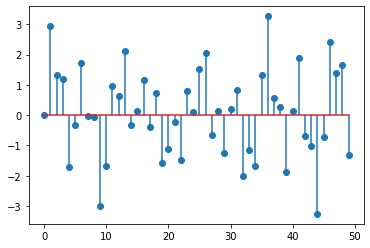

In [77]:
stem(x[:50], use_line_collection=True)

In [78]:
L = 257
fc = 600

hsupp = np.arange(-(L-1)/2, (L-1)/2+1)
hideal = (2*fc/Fs)*np.sinc(2*fc*hsupp/Fs)
h = np.hamming(L) * hideal

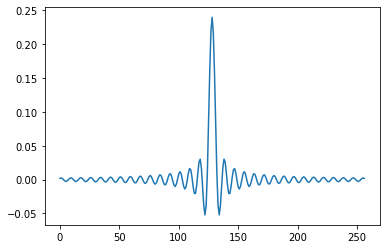

In [79]:
plt.plot(hideal)

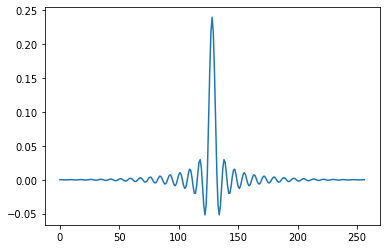

In [80]:
plt.plot(h)

In [101]:
Nfft = 2**nextpow2(L+M-1)

xzp = np.pad(x, (0, Nfft-M))
hzp = np.pad(x, (0, Nfft-L+1))

X = np.fft.fft(xzp)
H = np.fft.fft(hzp)

(512,)

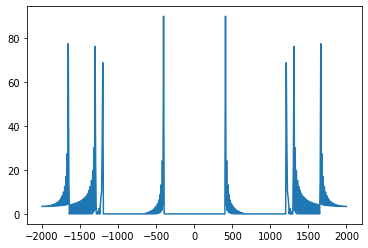

In [126]:
domain = np.linspace(-2000, 2000, X.shape[0])
X_real = np.real(X)
X_real[X_real <= 0] = 0
plt.plot(domain, X_real)

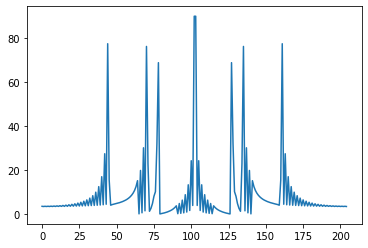

In [108]:
plt.plot(np.real(H[H >= 0]))

In [104]:
Y = X * H

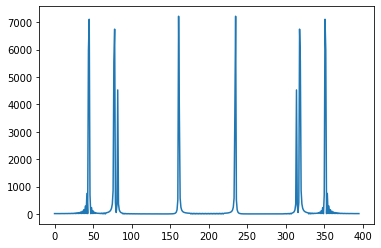

In [110]:
plt.plot(np.real(Y[Y >= 0]))

In [127]:
y = ifft(Y)
relrmserr = 